In [22]:
import pandas as pd 
import numpy as np
import datetime 
from datetime import datetime

import matplotlib.pyplot as plt

#### Things we're looking into: 
1. When were the growth spurts? (Compare BF sessions - duration between sessions, length of sessions) 
2. Number of diapers and correlation with BF sessions
3. Does more sleep in the day beget more sleep at night? 
4.

In [74]:
# !pip install --upgrade matplotlib

In [48]:
aadi_data= pd.read_csv('export_narababy_aadi_20221130.csv',error_bad_lines=False, skiprows= 9)
DoB= datetime(2022, 10, 17, 19, 50, 15)  
aadi_data['beginDatetimeLocal']=pd.to_datetime(aadi_data['beginDatetimeLocal'])
aadi_data['Age']= aadi_data['beginDatetimeLocal']- DoB # adding age into the dataframe

aadi_data = aadi_data.sort_values('beginDatetimeLocal', ascending=True)

In [24]:
aadi_data.typeKey.unique()

array(['MEDICAL.VACCINE', 'GROW', 'FEED.BREAST', 'DIAPER', 'ROUTINE',
       'FEED.BOTTLE', 'SLEEP', 'PUMP'], dtype=object)

In [25]:
aadi_data.columns


Index(['familyKey', 'activityKey', 'profileKey', 'typeGroupKey', 'typeKey',
       'beginDatetimeLocal', 'beginDatetime', 'DIAPER_type', 'DIAPER_detail',
       'DIAPER_dirtyColor', 'DIAPER_dirtyTexture', 'FEED.BOTTLE_bottleType',
       'FEED.BOTTLE_breastMilkVolume', 'FEED.BOTTLE_breastMilkVolumeUnit',
       'FEED.BOTTLE_formulaName', 'FEED.BOTTLE_formulaVolume',
       'FEED.BOTTLE_formulaVolumeUnit', 'FEED.BOTTLE_volume',
       'FEED.BOTTLE_volumeUnit', 'FEED.BREAST_beginSide',
       'FEED.BREAST_endSide', 'FEED.BREAST_leftDurationSeconds',
       'FEED.BREAST_rightDurationSeconds', 'FEED.SOLID_foods',
       'FEED.SOLID_mealType', 'GROW_headSize', 'GROW_headSizeUnit',
       'GROW_height', 'GROW_heightUnit', 'GROW_weight', 'GROW_weightUnit',
       'MEDICAL.MEDICINE_medicinez', 'MEDICAL.TEMPERATURE_temperature',
       'MEDICAL.TEMPERATURE_temperatureUnit', 'MEDICAL.VACCINE_vaccine',
       'PUMP_bothVolume', 'PUMP_bothVolumeUnit', 'PUMP_leftVolume',
       'PUMP_leftVolumeUnit

In [12]:
sleep_df= aadi_data[aadi_data.typeKey=='SLEEP'].reset_index()[['beginDatetimeLocal', 'beginDatetime','SLEEP_endDatetimeLocal', 'SLEEP_endDatetime',
       'SLEEP_durationSeconds']] 


In [89]:
bf_df= aadi_data[aadi_data.typeKey=='FEED.BREAST'].reset_index()[['beginDatetimeLocal','beginDatetime',
       'FEED.BREAST_beginSide',
       'FEED.BREAST_endSide', 'FEED.BREAST_leftDurationSeconds',
       'FEED.BREAST_rightDurationSeconds','Age']]

bf_df['totalFeedMins']= (bf_df['FEED.BREAST_leftDurationSeconds'].fillna(0)+ bf_df['FEED.BREAST_rightDurationSeconds'].fillna(0))/60

In [156]:
bf_df.columns

Index(['beginDatetimeLocal', 'beginDatetime', 'FEED.BREAST_beginSide',
       'FEED.BREAST_endSide', 'FEED.BREAST_leftDurationSeconds',
       'FEED.BREAST_rightDurationSeconds', 'Age', 'totalFeedMins',
       'MinutesBetweenFeeds', 'Age_days'],
      dtype='object')

In [118]:
# Calculating time difference between feeds
bf_timedelta=np.abs(np.diff(bf_df['beginDatetimeLocal']))/ np.timedelta64(1, 'm') # time difference in minutes
bf_timedelta= np.insert(bf_timedelta, 0, 0)
bf_df['MinutesBetweenFeeds']= bf_timedelta
bf_df['Age_days']= bf_df['Age'].dt.days



In [121]:

# # ax.xaxis.set_major_formatter(day_month_formatter)
# bf_df.plot.scatter(x='Age',
#                 y='MinutesBetweenFeeds',
#                 c='DarkBlue')
# plt.xticks(rotation = 90)

(array([1.6655e+12, 1.6660e+12, 1.6665e+12, 1.6670e+12, 1.6675e+12,
        1.6680e+12, 1.6685e+12, 1.6690e+12, 1.6695e+12, 1.6700e+12,
        1.6705e+12]),
 <a list of 11 Text xticklabel objects>)

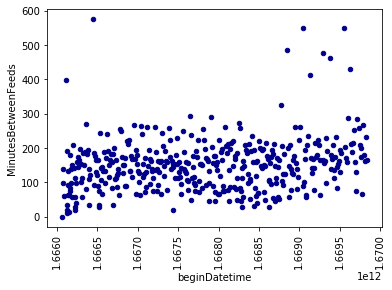

In [122]:

bf_df.plot.scatter(x='beginDatetime',
                y='MinutesBetweenFeeds',
                c='DarkBlue')

plt.xticks(rotation = 90)

In [154]:
bf_df_diff= bf_df[['Age_days', 'MinutesBetweenFeeds','totalFeedMins' ]]
# bf_df_diff.Age_days.unique()

# bf_df_diff.groupby('Age_days').count()

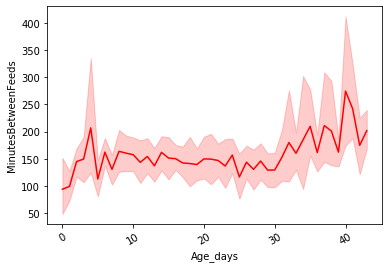

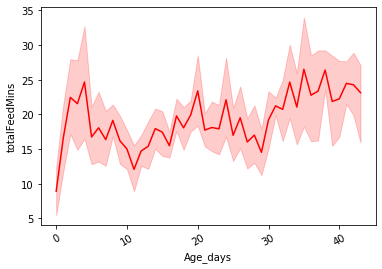

In [162]:
for y_axis in ["MinutesBetweenFeeds","totalFeedMins"]: 
    sns.lineplot(x = "Age_days", y = y_axis , 
                 color = 'r', data = bf_df)
    plt.xticks(rotation=30)
    plt.show()


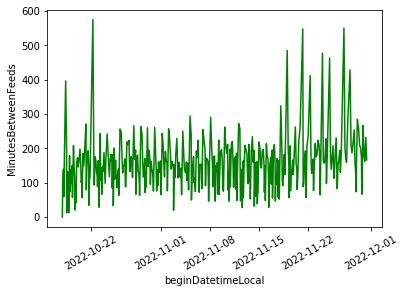

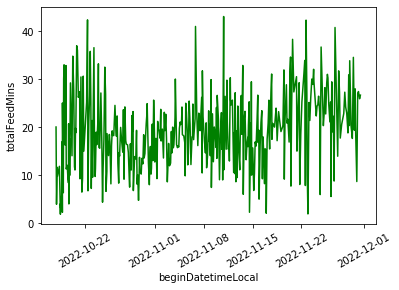

In [157]:
import seaborn as sns 
for y_axis in ["MinutesBetweenFeeds","totalFeedMins"]: 
    sns.lineplot(x = "beginDatetimeLocal", y = y_axis , 
                 color = 'g', data = bf_df)
    plt.xticks(rotation=30)
    plt.show()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3d5374f10>,
      dtype=object)

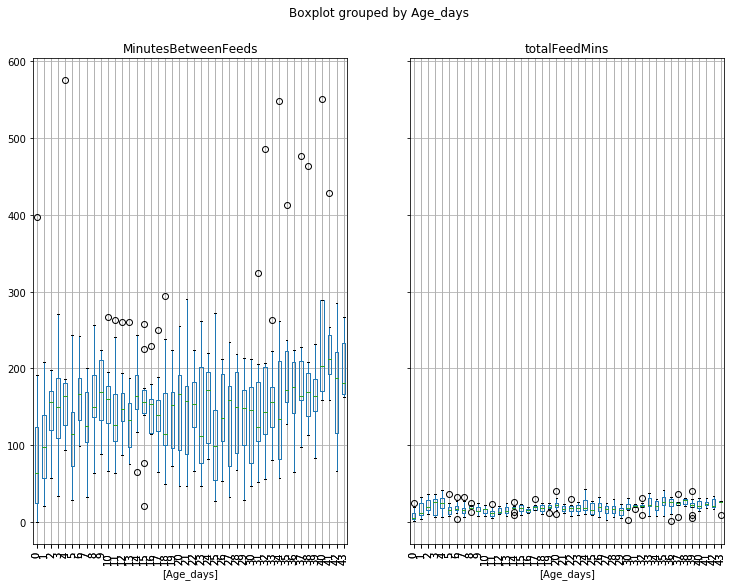

In [139]:

bf_df_diff.boxplot(by='Age_days', figsize=(12, 9), rot=90)
